In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<Axes: xlabel='Date'>

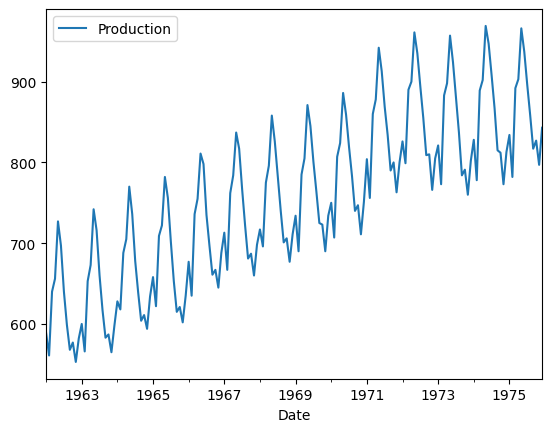

In [2]:
df.plot()

In [3]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [4]:
train=df.iloc[:156]
test=df.iloc[156:]

In [5]:
train.shape

(156, 1)

In [6]:
test.shape

(12, 1)

In [7]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [8]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [9]:
n_inputs=12
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)

In [10]:
generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [11]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [12]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(12,1)))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',loss='mse')

In [14]:
r=model.fit(generator,epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1164
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0230
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0162
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0131
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0079
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0107
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031


In [16]:
r.history

{'loss': [0.05448094755411148,
  0.022553754970431328,
  0.016536101698875427,
  0.010693032294511795,
  0.005874295253306627,
  0.0055573470890522,
  0.0051972041837871075,
  0.004732889588922262,
  0.006560100708156824,
  0.0036177481524646282]}

In [17]:
#prediction

In [18]:
scaled_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [19]:
#input for above first value is the last 12 values from the train set
#input for above second value is last 11 values from the train set + predicted value of the first value from the above test test

last_train_batch=scaled_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [22]:
last_train_batch=last_train_batch.reshape(1,12,1)  #we add 1 dimension in prediction(for format matching)
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.602889]], dtype=float32)

In [25]:
test_prediction=[]
first_eval_batch=scaled_train[-12:]
current_batch=first_eval_batch.reshape(1,12,1)
for i in range(len(scaled_test)):
  current_pred=model.predict(current_batch)[0]
  test_prediction.append(current_pred)

  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [26]:
test_prediction

[array([0.602889], dtype=float32),
 array([0.6420867], dtype=float32),
 array([0.75244296], dtype=float32),
 array([0.84029716], dtype=float32),
 array([0.92729294], dtype=float32),
 array([0.9140199], dtype=float32),
 array([0.83477277], dtype=float32),
 array([0.7255743], dtype=float32),
 array([0.62754184], dtype=float32),
 array([0.57541376], dtype=float32),
 array([0.550621], dtype=float32),
 array([0.55914634], dtype=float32)]

In [27]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [28]:
true_prediction=scaler.inverse_transform(test_prediction)
true_prediction

array([[803.80182457],
       [820.10806084],
       [866.01626968],
       [902.56361961],
       [938.75386429],
       [933.23227119],
       [900.2654705 ],
       [854.83891487],
       [814.05740547],
       [792.37212563],
       [782.05832481],
       [785.60487938]])

In [29]:
test["True Prediction"]=true_prediction
test

<ipython-input-29-5c829dd5b229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["True Prediction"]=true_prediction


,Production,True Prediction
Date,,
1975-01-01,834,803.801825
1975-02-01,782,820.108061
1975-03-01,892,866.016270
1975-04-01,903,902.563620
1975-05-01,966,938.753864
1975-06-01,937,933.232271
1975-07-01,896,900.265471
1975-08-01,858,854.838915
1975-09-01,817,814.057405


<Axes: xlabel='Date'>

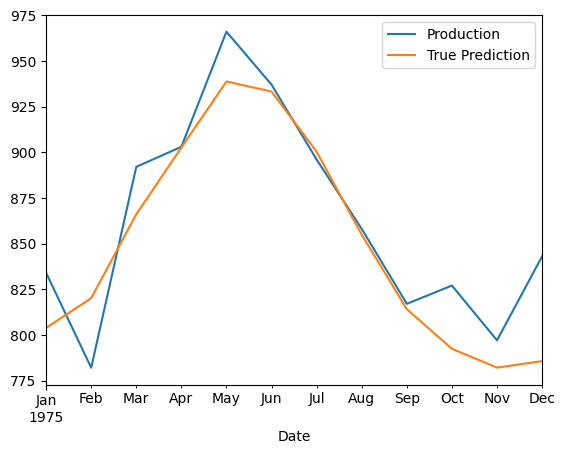

In [30]:
test.plot()

In [31]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape=mean_absolute_percentage_error(test['Production'],test['True Prediction'])
mape

0.023960792029067493

In [33]:
score=r2_score(test['Production'],test['True Prediction'])
score

0.7571781029353775